## **<span style="color:#023e8a;font-size:200%"><center>EDA</center></span><span style="color:#023e8a;font-size:200%"><center>Exploratory Data Analysis. H&M</center></span>**

# **<a id="Content">Table of Content</a>**
* [**<span>1. First steps</span>**](#First)  
* [**<span>2. Articles</span>**](#Articles)  
* [**<span>3. Customers</span>**](#Customers)  
* [**<span>4. Transactions</span>**](#Transactions)  
* [**<span>5. Images with description and price</span>**](#Images)  


## **<span>Intro</span>**

**<span>The competition is dedicated to the product recomendations (H&M)  </span>**

**<span>Here we have different kinds of data that help us to get good recomendations: </span>**

📸 `images` - images of every article_id

🙋 `articles`  - detailed metadata of every article_id

👔 `customers`  - detailed metadata of every customer_id

🧾 `transactions_train`  - purchases with details

## **<span id="First" style="color:#023e8a;">1. First steps</span>**

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from datetime import datetime

In [2]:
articles = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/articles.csv")
customers = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/customers.csv")
transactions = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

## **<span id="Articles">2. Articles</span>**

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)

**<span> This table contains all h&m articles with details such as a type of product, a color, a product group and other features.</span>**  
**<span> Article data description: </span>**

> `article_id` **<span >: A unique identifier of every article.</span>**  
> `product_code`, `prod_name` **<span style="color:#023e8a;">: A unique identifier of every product and its name (not the same).</span>**  
> `product_type`, `product_type_name` **<span style="color:#023e8a;">: The group of product_code and its name</span>**  
> `graphical_appearance_no`, `graphical_appearance_name` **<span style="color:#023e8a;">: The group of graphics and its name</span>**  
> `colour_group_code`, `colour_group_name` **<span style="color:#023e8a;">: The group of color and its name</span>**  
> `graphical_appearance_no`, `graphical_appearance_name` **<span style="color:#023e8a;">: The group of graphics and its name</span>**  
> `perceived_colour_value_id`, `perceived_colour_value_name`, `perceived_colour_master_id`, `perceived_colour_master_name` **<span style="color:#023e8a;">: The added color info</span>**  
> `department_no`, `department_name`: **<span style="color:#023e8a;">: A unique identifier of every dep and its name</span>**  
> `index_code`, `index_name`: **<span style="color:#023e8a;">: A unique identifier of every index and its name</span>**  
> `index_group_no`, `index_group_name`: **<span style="color:#023e8a;">: A group of indeces and its name</span>**  
> `section_no`, `section_name`: **<span style="color:#023e8a;">: A unique identifier of every section and its name</span>**  
> `garment_group_no`, `garment_group_name`: **<span style="color:#023e8a;">: A unique identifier of every garment and its name</span>**  
> `detail_desc`: **<span style="color:#023e8a;">: Details</span>**  

In [3]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


**<span>Ladieswear accounts for a significant part of all dresses. Sportswear has the least portion.</span>**

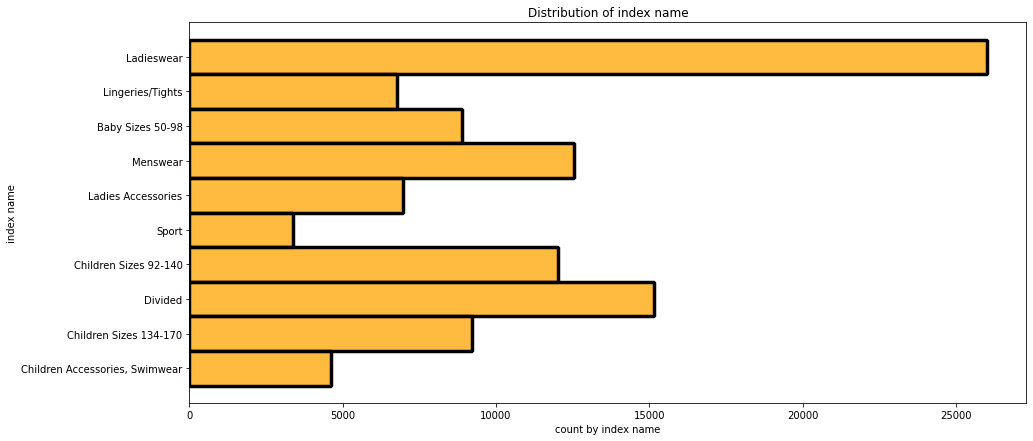

In [4]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='index_name', color='orange')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
ax.set_title('Distribution of index name')
plt.show()

**<span> The garments grouped by index: Jersey fancy is the most frequent garment, especially for women and children. The next by number is accessories, many various accessories with low price.</span>**

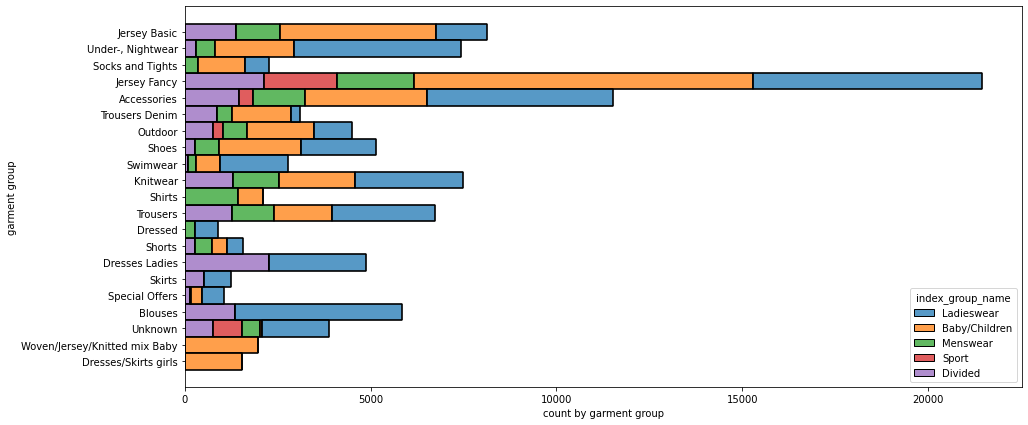

In [5]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name', color='orange', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

In [6]:
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


**<span>Now, pay attention to index group-index structure. Ladieswear and Children/Baby have subgroups.</span>**

In [7]:
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

**<span> And look at the product group-product structure. Accessories are really various, the most numerious: bags, earrings and hats. However, trousers prevail.</span>**

In [8]:
pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

**<span> And the table with number of unique values in columns:</span>**

In [9]:
for col in articles.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = articles[col].nunique()
        print(f'number of unique {col}: {un_n}')

number of unique prod_name: 45875
number of unique product_type_name: 131
number of unique product_group_name: 19
number of unique graphical_appearance_name: 30
number of unique colour_group_name: 50
number of unique perceived_colour_value_name: 8
number of unique perceived_colour_master_name: 20
number of unique department_name: 250
number of unique index_name: 10
number of unique index_group_name: 5
number of unique section_name: 56
number of unique garment_group_name: 21
number of unique detail_desc: 43404


## **<span id="Customers">3. Customers</span>**

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)

**<span> Customers data description: </span>**

> `customer_id` **<span>: A unique identifier of every customer</span>**  
> `FN` **<span>: 1 or missed </span>**  
> `Active` **<span>: 1 or missed</span>**  
> `club_member_status` **<span>: Status in club</span>**  
> `fashion_news_frequency` **<span>: How often H&M may send news to customer</span>**  
> `age` **<span>: The current age</span>**  
> `postal_code` **<span>: Postal code of customer</span>**  

In [10]:
pd.options.display.max_rows = 50
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


**<span> There are no duplicates in </span>** `customers`

In [11]:
customers.shape[0] - customers['customer_id'].nunique()

0

**<span> Here we have abnormal number of customers by one postal code. One has 120303, it might be encoded nan adress or smth like a huge distribution center, or pickup.</span>**

In [12]:
data_postal = customers.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
data_postal.head()

,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,42874,39886,118281,114377,118002
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,109,104,261,261,260
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,90,88,159,159,158
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,55,54,157,156,156
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,42,41,156,156,155


**<span> Ages, club_member_status are different, like customer_ids.</span>**

In [13]:
customers[customers['postal_code']=='2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c'].head(5)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
11,000097d91384a0c14893c09ed047a963c4fc6a5c021044...,NaN,NaN,ACTIVE,NONE,31.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
14,0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...,1.0,1.0,ACTIVE,Regularly,29.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


**<span> The most common age is about 21-23</span>**

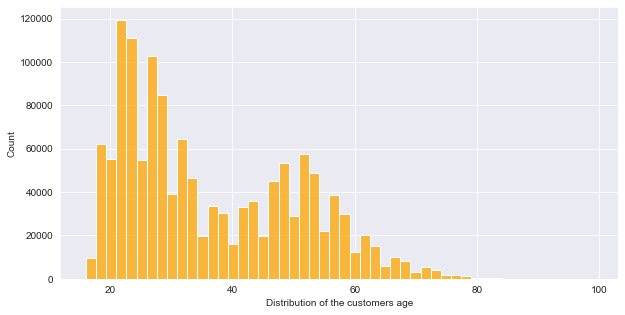

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='age', bins=50, color='orange')
ax.set_xlabel('Distribution of the customers age')
plt.show()

In [15]:
customers.club_member_status.unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

**<span> Status in H&M club. Almost every customer has an active club status, some of them begin to activate it (pre-create). A tiny part of customers abandoned the club.</span>**

In [16]:
print("NaN values dsitribution in CUSTOMER dataset: ")
customers.isnull().sum(axis = 0)

NaN values dsitribution in CUSTOMER dataset: 


customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [17]:
customers['club_member_status'].fillna('None', inplace=True)

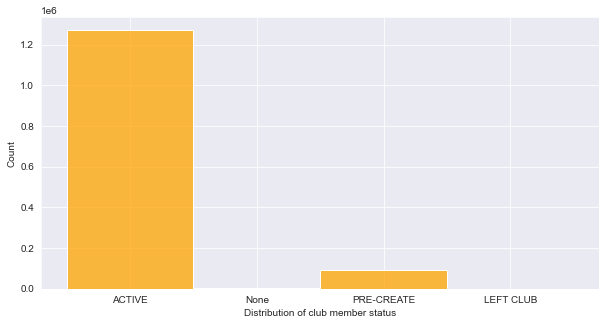

In [18]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='club_member_status', color='orange')
ax.set_xlabel('Distribution of club member status')
plt.show()

**<span> Here we have three types for NO DATA. Let's unite these values.</span>**

In [20]:
customers.loc[~customers['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'
customers['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

In [21]:
pie_data = customers[['customer_id', 'fashion_news_frequency']].groupby('fashion_news_frequency').count()

**<span> Customers prefer not to get any messages about the current news.</span>**

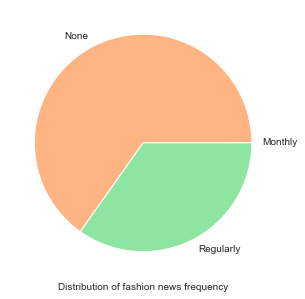

In [22]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
# ax = sns.histplot(data=customers, x='fashion_news_frequency', color='orange')
# ax = sns.pie(data=customers, x='fashion_news_frequency', color='orange')
colors = sns.color_palette('pastel')
ax.pie(pie_data.customer_id, labels=pie_data.index, colors = colors)
ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of fashion news frequency')
plt.show()

## **<span id="Transactions">4. Transactions</span>**

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)

**<span> Transactions data description: </span>**

> `t_dat` **<span>: A unique identifier of every customer</span>**  
> `customer_id` **<span>: A unique identifier of every customer </span>**  **<span style="color:#FF0000;">(in </span>** `customers` **<span style="color:#FF0000;"> table)</span>**  
> `article_id` **<span>: A unique identifier of every article</span>**  **<span style="color:#FF0000;">(in </span>** `articles` **<span style="color:#FF0000;"> table)</span>**  
> `price` **<span>: Price of purchase</span>**  
> `sales_channel_id` **<span>: 1 or 2</span>**  

In [23]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


**<span> Here we see outliers for price. </span>**

In [24]:
pd.set_option('display.float_format', '{:.4f}'.format)
transactions.describe()['price']

count   31788324.0000
mean           0.0278
std            0.0192
min            0.0000
25%            0.0158
50%            0.0254
75%            0.0339
max            0.5915
Name: price, dtype: float64

In [25]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.0508,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.0305,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.0152,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.0169,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.0169,2


In [40]:
transactions.t_dat.min()

'2018-09-20'

In [41]:
transactions.t_dat.max()

'2020-09-22'

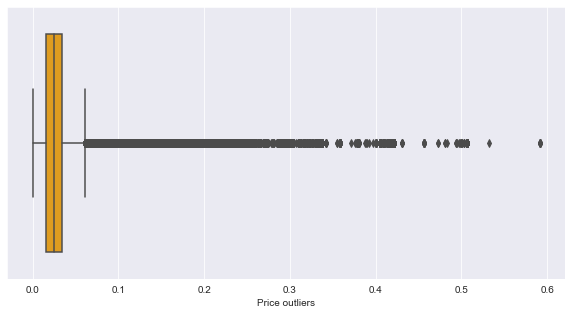

In [27]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=transactions, x='price', color='orange')
ax.set_xlabel('Price outliers')
plt.show()

**<span> Top 10 customers by num of transactions. </span>**

In [28]:
transactions_byid = transactions.groupby('customer_id').count()

In [60]:
transactions_byid

,t_dat,article_id,price,sales_channel_id
customer_id,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,21,21,21,21
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,86,86,86,86
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,18,18,18,18
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,2,2,2,2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,13,13,13,13
...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,51,51,51,51
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,84,84,84,84
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,45,45,45,45


In [59]:
transactions.groupby('customer_id').count().mean()

t_dat              23.3346
article_id         23.3346
price              23.3346
sales_channel_id   23.3346
dtype: float64

In [29]:
transactions_byid.sort_values(by='price', ascending=False)['price'][:10]

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1157
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1143
Name: price, dtype: int64

In [30]:
transactions_byid

,t_dat,article_id,price,sales_channel_id
customer_id,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,21,21,21,21
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,86,86,86,86
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,18,18,18,18
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,2,2,2,2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,13,13,13,13
...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,51,51,51,51
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,84,84,84,84
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,45,45,45,45


In [31]:
transactions_byid.describe()

,t_dat,article_id,price,sales_channel_id
count,1362281.0000,1362281.0000,1362281.0000,1362281.0000
mean,23.3346,23.3346,23.3346,23.3346
std,39.2423,39.2423,39.2423,39.2423
min,1.0000,1.0000,1.0000,1.0000
25%,3.0000,3.0000,3.0000,3.0000
50%,9.0000,9.0000,9.0000,9.0000
75%,27.0000,27.0000,27.0000,27.0000
max,1895.0000,1895.0000,1895.0000,1895.0000


In [32]:
transactions_byid.columns

Index(['t_dat', 'article_id', 'price', 'sales_channel_id'], dtype='object')

In [33]:
transactions[transactions['customer_id'] == 'be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b']

,t_dat,customer_id,article_id,price,sales_channel_id
83738,2018-09-21,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,658506001,0.0593,1
83739,2018-09-21,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,662980002,0.0339,1
109160,2018-09-22,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,667709001,0.0508,2
109161,2018-09-22,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,685687001,0.0169,2
109162,2018-09-22,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,685687001,0.0169,2
...,...,...,...,...,...
31541312,2020-09-15,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,886566001,0.0339,2
31541313,2020-09-15,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,886566001,0.0339,2
31541314,2020-09-15,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,904965002,0.0424,2
31541315,2020-09-15,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,926502001,0.0593,2


In [51]:
def plot_transaction(transactions):
    article_cnt = transactions.groupby(["t_dat"])["article_id"].count().reset_index() #.sample(100_000)
    article_cnt["t_dat"] = article_cnt["t_dat"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
    article_cnt.columns = ["Date", "Transactions"]

    fig, ax = plt.subplots(1, 1, figsize=(16,6))
    plt.plot(article_cnt["Date"], article_cnt["Transactions"], color="Darkgreen")
    plt.xlabel("Date")
    plt.ylabel("Transactions")
    plt.title(f"Transactions per day (100k sample; to get the real volume, please consider that real transaction count is {round(transactions.shape[0]/10.e6,2)}M)")
    plt.show()

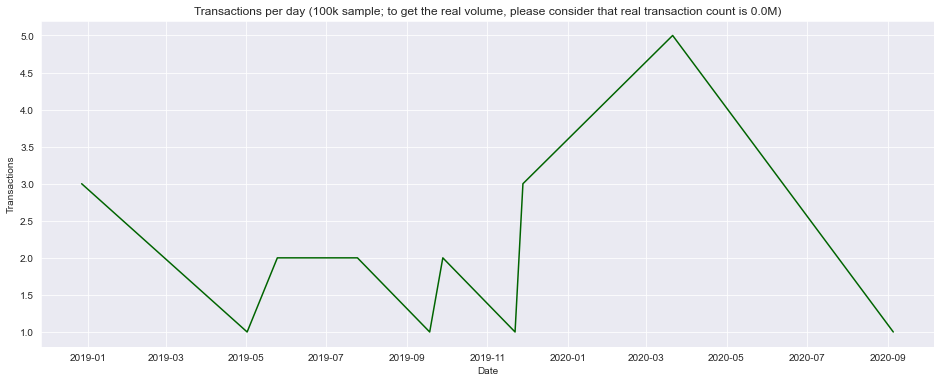

In [61]:
plot_transaction(transactions[transactions['customer_id'] == '00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657'])

#### Distribution of each transaction price

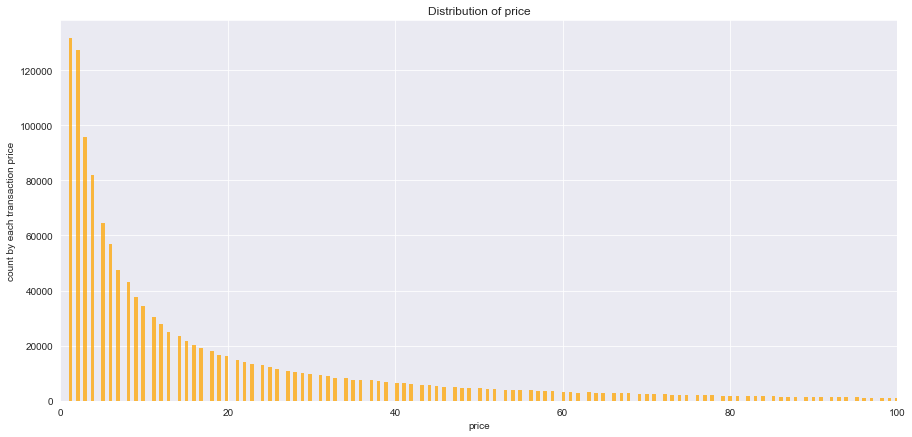

In [63]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=transactions_byid, ｘ='price', color='orange')
ax.set_ylabel('count by each transaction price')
ax.set_xlabel('price')
ax.set_title('Distribution of price')
ax.set_xlim(0,100)
# ax.yaxis.set_ylim(labelsize=22)
plt.show()

However, comparing prices inside groups is more accurate, because accessories and trousers prices may vary largerly

**<span> Get subset from articles and merge it to transactions. </span>**

In [35]:
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]

In [36]:
articles_for_merge = transactions[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

**<span> Here we see outliers for group name prices. Lower/Upper/Full body have a huge price variance. I guess it could be like some unique collections, relative to casual ones. Some high price articles even belong to accessories group.</span>**

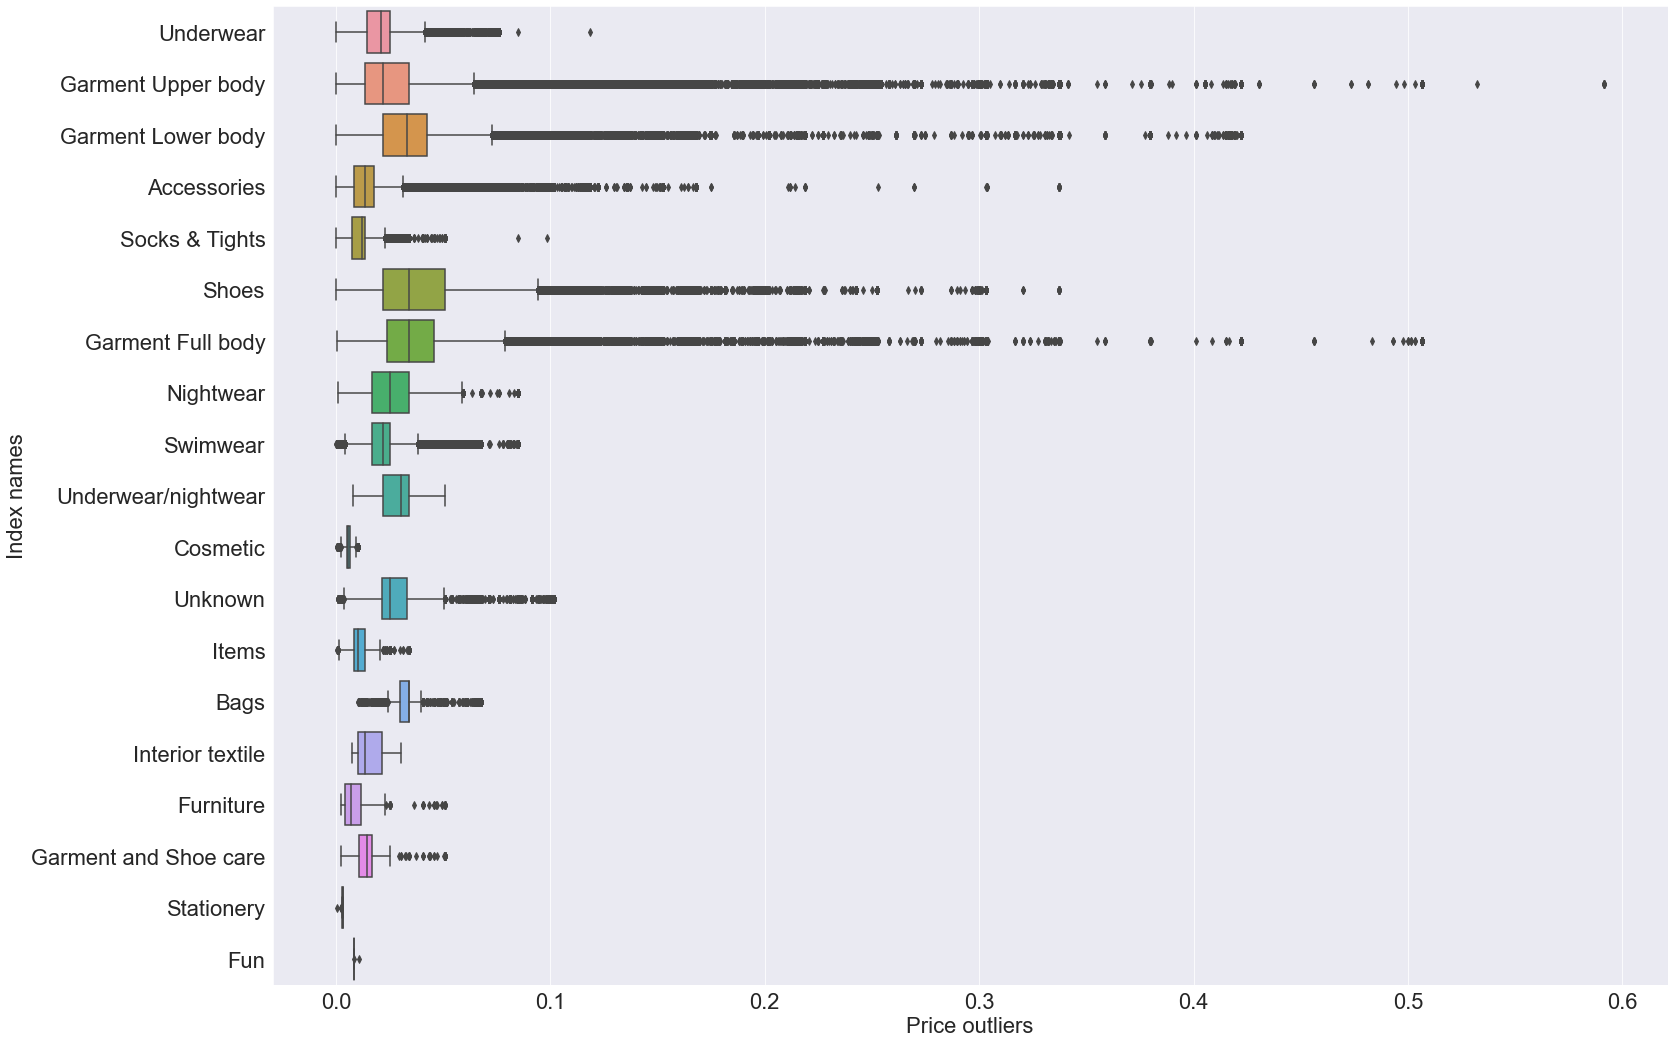

In [37]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=articles_for_merge, x='price', y='product_group_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

plt.show()

**<span> Then look at boxplot prices according to accessories product group and find the reasons of high prices inside group.</span>**

**<span> The largest outliers can be found among bags, which is logical enough. In addition, scarves and other accessories have articles with prices highly contrasting to the rest of garments.</span>**

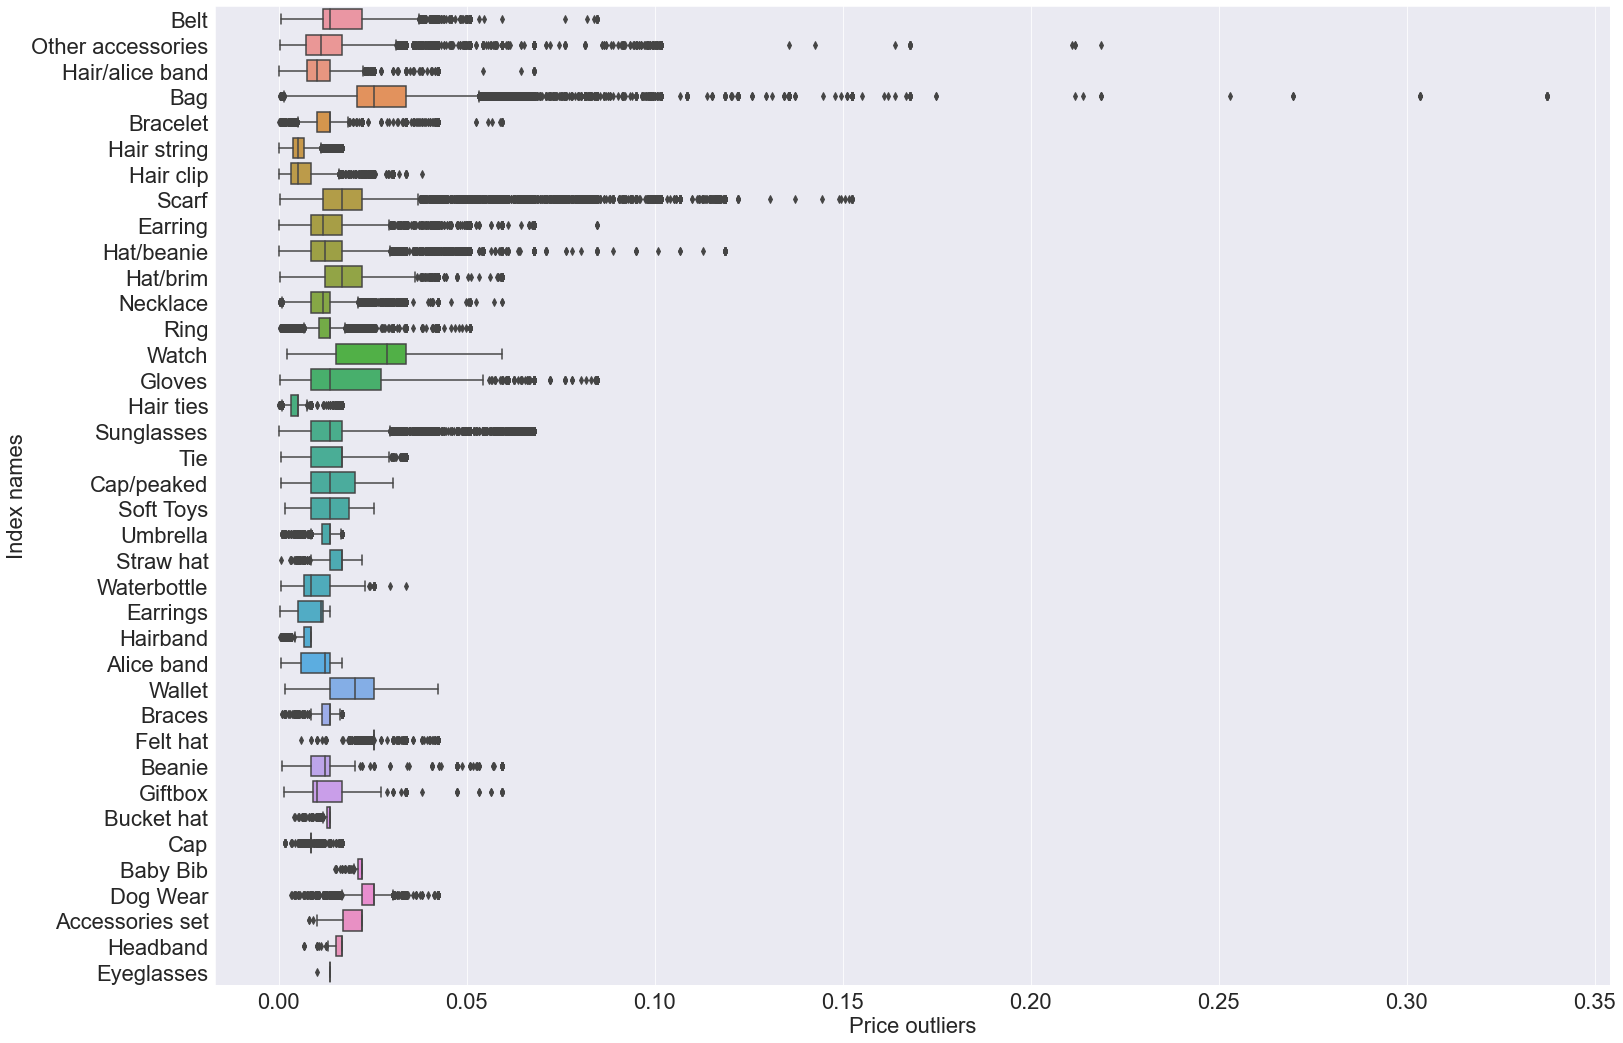

In [38]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
_ = articles_for_merge[articles_for_merge['product_group_name'] == 'Accessories']
ax = sns.boxplot(data=_, x='price', y='product_type_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
del _

plt.show()

**<span style="color:#023e8a;"> The index with the highest mean price is Ladieswear. With the lowest - children. </span>**

In [ ]:
articles_index = articles_for_merge[['index_name', 'price']].groupby('index_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by index')
ax.set_ylabel('Index')
plt.show()

**<span style="color:#023e8a;"> Stationery has the lowest mean price, the highest - shoes. </span>**

In [ ]:
articles_index = articles_for_merge[['product_group_name', 'price']].groupby('product_group_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by product group')
ax.set_ylabel('Product group')
plt.show()

**<span style="color:#023e8a;"> Now check the mean price change in time for top 5 product groups by mean price: </span>**
>`Shoes`  
>`Garment Full body`  
>`Bags`  
>`Garment Lower body`  
>`Underwear/nightwear`  

In [ ]:
articles_for_merge['t_dat'] = pd.to_datetime(articles_for_merge['t_dat'])

In [ ]:
product_list = ['Shoes', 'Garment Full body', 'Bags', 'Garment Lower body', 'Underwear/nightwear']
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen']
k = 0
f, ax = plt.subplots(3, 2, figsize=(20, 15))
for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == product_list[k]]
            series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
            series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
                             (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
            ax[i, j].set_title(f'Mean {product_list[k]} price in time')
            ax[i, j].set_xlabel('month')
            ax[i, j].set_xlabel(f'{product_list[k]}')
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)
plt.show()

## **<span id="Images" style="color:#023e8a;">5. Images with description and price</span>**

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)

**<span style="color:#023e8a;"> Let's check the last purchases by max price and by min price </span>**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
max_price_ids = transactions[transactions.t_dat==transactions.t_dat.max()].sort_values('price', ascending=False).iloc[:5][['article_id', 'price']]
min_price_ids = transactions[transactions.t_dat==transactions.t_dat.min()].sort_values('price', ascending=True).iloc[:5][['article_id', 'price']]

**<span style="color:#023e8a;"> Photos with description and price (top 5 max) </span>**

In [ ]:
f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for _, data in max_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 5 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'../input/h-and-m-personalized-fashion-recommendations/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.2f}')
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    ax[i].set_xlabel(desc, fontsize=10)
    i += 1
plt.show()

**<span style="color:#023e8a;"> Photos with description and price (top 5 min) </span>**

In [ ]:
f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for _, data in min_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 4 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'../input/h-and-m-personalized-fashion-recommendations/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.4f}')
    ax[i].set_xlabel(desc, fontsize=10)
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    i += 1
plt.axis('off')
plt.show()